<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-saadchamsi/blob/main/exercices_pratiques_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Scipy — CALCULS SCIENTIFIQUES ET OUTILS D'ANALYSE AVANCÉE EN PYTHON
_Master IA-GI — Notebook 3 : Exercices Pratiques_

> **But du notebook** : Maîtriser les outils de calcul scientifique et d'analyse avancée avec Scipy en Python (2025)<br>
> **Module** : *Python pour les Sciences de Données* – Master 1
> <br>**Basé sur** [le support de cours](https://fr.slideshare.net/slideshow/introduction-a-scipy-calcul-scientifique-et-analyse-avancee-en-python/284636885) de **Youssouf EL ALLIOUI** – FPK USMS

**Objectifs :**
- Appliquer les constantes scientifiques et effectuer des calculs physiques précis avec `scipy.constants`
- Résoudre des problèmes d'optimisation réels (ajustement de courbes, minimisation) avec `scipy.optimize`
- Maîtriser l'interpolation de données expérimentales avec `scipy.interpolate`
- Réaliser des analyses statistiques rigoureuses (tests d'hypothèses, corrélations) avec `scipy.stats`
- Manipuler efficacement les matrices creuses et analyser des graphes avec `scipy.sparse`
- Exploiter les algorithmes spatiaux (KDTree, Voronoi, enveloppe convexe) avec `scipy.spatial`
- Traiter et filtrer des signaux numériques avec la FFT via `scipy.signal` et `scipy.fftpack`
- Appliquer les techniques de traitement d'images (morphologie, filtrage) avec `scipy.ndimage`
- Développer un pipeline complet de classification avec `scipy.datasets`

**Structure du notebook :**
- **Chapitre 1** : 3 exercices sur les bases (constants, optimize, interpolate)
- **Chapitre 2** : 3 exercices sur les structures avancées (stats, sparse, spatial)
- **Chapitre 3** : 3 exercices sur les applications (signal, ndimage, mini-projet intégratif)

**Prérequis :**
- Connaissance de base en Python (NumPy, Matplotlib)
- Notions mathématiques : algèbre linéaire, statistiques descriptives, analyse de Fourier

**Consignes générales :**
- Exécutez les cellules dans l'ordre
- Commentez votre code de manière claire
- Créez des visualisations lisibles avec titres et légendes
- Analysez et interprétez vos résultats
- N'hésitez pas à consulter la documentation officielle : https://docs.scipy.org/

**Niveau :** Master 1 Intelligence Artificielle et Génie Informatique

**Contact :** y.elallioui@usms.ma

# CHAPITRE 1 : Introduction à SciPy et manipulation scientifique de base


## Exercice 1.1 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé
Vous travaillez sur un projet de simulation physique. Créez un programme qui calcule :

1. L'énergie d'un photon de lumière bleue (λ = 450 nm) en joules et en électron-volts
   - Formule : E = h × c / λ
   - h : constante de Planck, c : vitesse de la lumière

2. La force gravitationnelle entre la Terre et la Lune
   - Formule : F = G × (m₁ × m₂) / r²
   - Masse Terre : 5.972e24 kg, Masse Lune : 7.342e22 kg
   - Distance : 384,400 km

3. Convertir une pression de 2.5 atmosphères en :
   - Pascals
   - PSI (pounds per square inch)
   - Bars

### Indices
- Utilisez `scipy.constants` pour toutes les constantes
- La distance doit être convertie en mètres
- Affichez les résultats avec 3 décimales significatives


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from scipy import constants
from scipy.optimize import curve_fit, minimize
from scipy.interpolate import interp1d
from scipy import stats
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components, shortest_path
from scipy.spatial import distance_matrix, KDTree, ConvexHull, Voronoi, Delaunay
from scipy.signal import detrend
from scipy.fft import fft, ifft, fftfreq
from scipy.integrate import quad
from scipy.ndimage import (
    gaussian_filter, sobel, binary_closing, label,
    binary_opening, center_of_mass
)

plt.style.use("seaborn-v0_8")

# Photon bleu
lambda_m = 450e-9
E_joule = constants.h * constants.c / lambda_m
E_ev = E_joule / constants.e

# Force Terre–Lune
m_terre = 5.972e24
m_lune = 7.342e22
r = 384_400e3
F = constants.G * m_terre * m_lune / r**2

# Pression
P_atm = 2.5
P_pa = P_atm * constants.atm
P_psi = P_pa / constants.psi
P_bar = P_pa / 1e5

print(E_joule, E_ev, F, P_pa, P_psi, P_bar)



4.414324126997619e-19 2.7552044096266726 1.9804922390990566e+20 253312.5 36.73987193878362 2.533125


## Exercice 1.2 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé

Cet exercice vous familiarise avec le module `scipy.constants`.

**Tâches :**

1. **Conversions d'unités :** En utilisant `scipy.constants`, calculez :
   - Combien de mètres dans 5 miles ?
   - Combien de secondes dans 2.5 jours ?
   - Combien de Pascals dans 3 atmosphères ?
   - Combien de Joules dans 500 calories ?

2. **Calcul physique :**
   - La vitesse de la lumière est disponible via `constants.c`
   - Calculez le temps (en secondes) que met la lumière pour parcourir la distance Terre-Soleil (1 unité astronomique, disponible via `constants.au`)

3. **Affichage formaté :**
   - Affichez tous les résultats avec des messages explicatifs
   - Arrondissez les valeurs à 2 décimales quand approprié

In [10]:
print(5 * constants.mile)
print(2.5 * constants.day)
print(3 * constants.atm)
print(500 * constants.calorie)

temps = constants.au / constants.c
print(temps)


8046.719999999999
216000.0
303975.0
2092.0
499.00478383615643


## Exercice 1.3 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Une entreprise marocaine de production d'huile d'argan souhaite optimiser son prix de vente.

**Données collectées** (prix en DH, quantité en litres) :
```
Prix :     [150, 180, 200, 220, 250, 280, 300]
Quantité : [850, 780, 720, 650, 580, 500, 420]
```

**Tâches :**

1. Utilisez `curve_fit` pour ajuster un modèle polynomial de degré 2 : `Q(p) = a×p² + b×p + c`

2. Calculez le revenu R(p) = p × Q(p) et trouvez le prix optimal qui maximise le revenu
   - Utilisez `minimize` avec la fonction négative du revenu

3. Visualisez sur un graphique :
   - Les points de données réels
   - La courbe ajustée Q(p)
   - Le point de revenu maximal

4. Affichez le prix optimal et le revenu maximal attendu

### Contraintes
- Le prix doit être entre 100 DH et 400 DH
- Utilisez `scipy.optimize.minimize` avec méthode='L-BFGS-B'


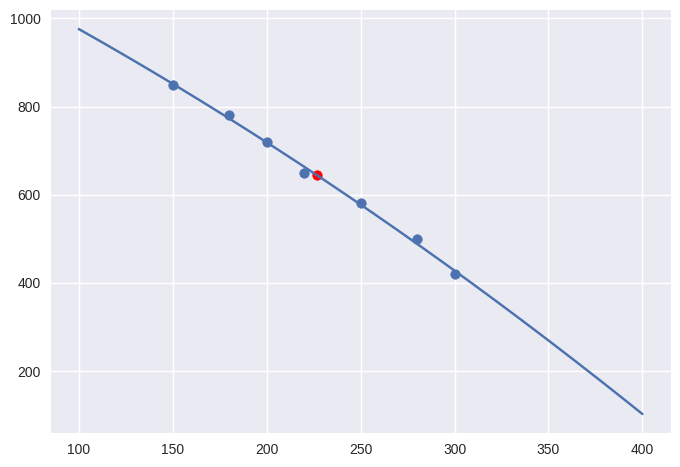

226.9682264713943 146075.2084815287


In [11]:
prix = np.array([150,180,200,220,250,280,300])
quantite = np.array([850,780,720,650,580,500,420])

def Q(p,a,b,c):
    return a*p**2 + b*p + c

params,_ = curve_fit(Q, prix, quantite)
a,b,c = params

def revenu_neg(p):
    return -(p * Q(p,a,b,c))

res = minimize(revenu_neg, x0=200, bounds=[(100,400)], method="L-BFGS-B")

p_opt = res.x[0]
R_max = -res.fun

p = np.linspace(100,400,300)

plt.scatter(prix,quantite)
plt.plot(p,Q(p,a,b,c))
plt.scatter(p_opt,Q(p_opt,a,b,c),c="r")
plt.show()

print(p_opt, R_max)


## Exercice 1.4 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez la croissance d'une population bactérienne. Les données suivent un modèle exponentiel.

**Tâches :**

1. **Générez des données simulées :**
   ```python
   np.random.seed(42)
   t = np.linspace(0, 10, 20)  # Temps en heures
   # Modèle réel : N(t) = N0 * exp(r*t) avec N0=100, r=0.3
   N_reel = 100 * np.exp(0.3 * t)
   N_observe = N_reel + np.random.randn(20) * 50  # Ajout de bruit
   ```

2. **Définissez le modèle exponentiel :**
   ```python
   def modele_exp(t, N0, r):
       return N0 * np.exp(r * t)
   ```

3. **Ajustez le modèle aux données** avec `curve_fit()`

4. **Visualisez les résultats :**
   - Points : données observées
   - Courbe : modèle ajusté
   - Affichez les paramètres trouvés (N0 et r) dans la légende

5. **Comparez** les paramètres trouvés aux paramètres réels (N0=100, r=0.3)

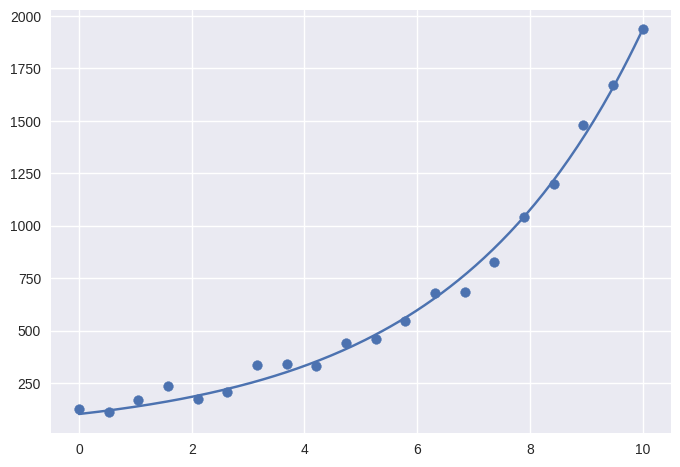

102.48957899454544 0.29387563904714537


In [12]:
np.random.seed(42)
t = np.linspace(0,10,20)
N_reel = 100*np.exp(0.3*t)
N_obs = N_reel + np.random.randn(20)*50

def modele_exp(t,N0,r):
    return N0*np.exp(r*t)

params,_ = curve_fit(modele_exp,t,N_obs)
N0_est,r_est = params

tf = np.linspace(0,10,200)
plt.scatter(t,N_obs)
plt.plot(tf,modele_exp(tf,N0_est,r_est))
plt.show()

print(N0_est,r_est)


## Exercice 1.5 : Interpolation de données climatiques
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Un centre météorologique à Fès a enregistré les températures suivantes en 2024 :

```
Mois :        [1,  2,  3,  4,   5,   6,   7,   8,   9,  10,  11,  12]
Température : [12, 14, 17, 20, 24, 29, 34, 33, 28, 22, 17, 13] (en °C)
```

**Tâches :**

1. Utilisez `interp1d` pour créer trois fonctions d'interpolation :
   - Linéaire
   - Quadratique
   - Cubique

2. Générez des valeurs interpolées pour chaque jour de l'année (365 points)

3. Calculez et affichez pour chaque méthode :
   - La température estimée au 15 mars (jour 74)
   - La température estimée au 10 août (jour 222)

4. Créez une visualisation comparative montrant :
   - Les points de mesure originaux
   - Les trois courbes d'interpolation avec des couleurs différentes
   - Une légende claire

5. Analysez : quelle méthode semble la plus réaliste pour des données climatiques ?


15.4 34.352204217536084


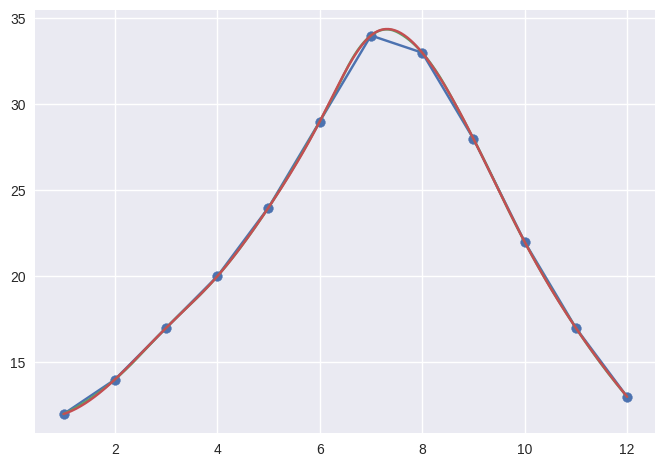

In [13]:
mois = np.arange(1,13)
temp = np.array([12,14,17,20,24,29,34,33,28,22,17,13])

jours = np.linspace(1,12,365)

f1 = interp1d(mois,temp,"linear")
f2 = interp1d(mois,temp,"quadratic")
f3 = interp1d(mois,temp,"cubic")

print(f1(74/30), f3(222/30))

plt.scatter(mois,temp)
plt.plot(jours,f1(jours))
plt.plot(jours,f2(jours))
plt.plot(jours,f3(jours))
plt.show()


## Exercice 1.6 : Analyse numérique complète
**Niveau : ⭐⭐⭐ Intermédiaire**

### Énoncé

Vous étudiez le mouvement d'un projectile. Ce problème mobilise plusieurs modules de SciPy.

**Partie A - Interpolation des données expérimentales :**

1. Vous disposez de mesures de la hauteur d'un projectile à différents instants :
   ```python
   t_mesure = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
   h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])
   ```

2. Créez une fonction d'interpolation cubique

3. Estimez la hauteur à t = 1.25s et t = 2.25s

**Partie B - Résolution d'équation :**

4. Utilisez `root()` pour trouver l'instant où le projectile retombe au sol (h = 0), en partant de t=2.5

**Partie C - Intégration numérique :**

5. La vitesse verticale est donnée par : v(t) = 20 - 10*t (m/s)

6. Calculez la hauteur maximale atteinte en intégrant v(t) de 0 à 2s avec `quad()`

**Partie D - Visualisation :**

7. Tracez sur un même graphique :
   - Les points de mesure
   - La courbe interpolée
   - Le point d'impact au sol trouvé
   - Une ligne horizontale à la hauteur maximale calculée

Hauteur à t=1.25 s : 20.00 m
Hauteur à t=2.25 s : 18.00 m
Instant d'impact au sol : 3.25 s
Hauteur maximale atteinte : 20.00 m


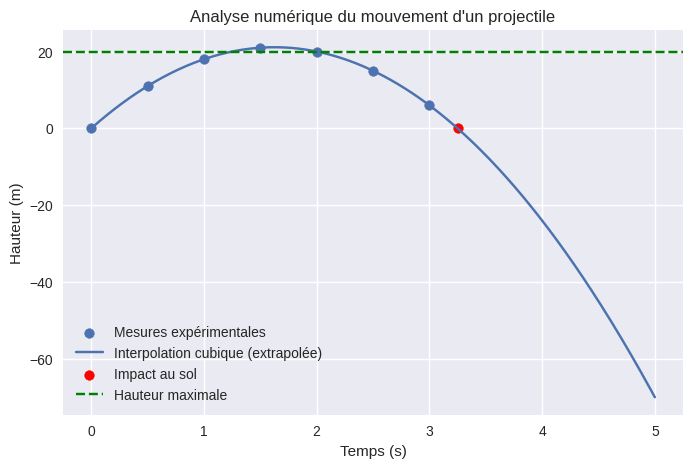

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar
from scipy.integrate import quad

# =========================
# DONNÉES EXPÉRIMENTALES
# =========================
t_mesure = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])

# =========================
# PARTIE A — INTERPOLATION
# (autoriser l'extrapolation)
# =========================
f = interp1d(
    t_mesure,
    h_mesure,
    kind="cubic",
    fill_value="extrapolate"
)

print(f"Hauteur à t=1.25 s : {f(1.25):.2f} m")
print(f"Hauteur à t=2.25 s : {f(2.25):.2f} m")

# =========================
# PARTIE B — IMPACT AU SOL
# (racine en dehors des mesures)
# =========================
sol = root_scalar(lambda t: f(t), bracket=[3.0, 5.0], method="brentq")
t_impact = sol.root

print(f"Instant d'impact au sol : {t_impact:.2f} s")

# =========================
# PARTIE C — INTÉGRATION
# =========================
def v(t):
    return 20 - 10*t

h_max, _ = quad(v, 0, 2)
print(f"Hauteur maximale atteinte : {h_max:.2f} m")

# =========================
# PARTIE D — VISUALISATION
# =========================
t_fine = np.linspace(0, 5, 400)

plt.figure(figsize=(8, 5))
plt.scatter(t_mesure, h_mesure, label="Mesures expérimentales")
plt.plot(t_fine, f(t_fine), label="Interpolation cubique (extrapolée)")
plt.scatter(t_impact, 0, color="red", label="Impact au sol")
plt.axhline(h_max, color="green", linestyle="--", label="Hauteur maximale")

plt.xlabel("Temps (s)")
plt.ylabel("Hauteur (m)")
plt.title("Analyse numérique du mouvement d'un projectile")
plt.legend()
plt.grid(True)
plt.show()


# CHAPITRE 2 : Analyse scientifique et structures avancées

## Exercice 2.1 : Analyse statistique d'un dataset médical
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous analysez les données de tension artérielle de 30 patients avant et après un traitement.

**Données :**
```python
avant = [145, 138, 152, 148, 155, 142, 149, 150, 147, 151,
         143, 146, 154, 141, 148, 153, 144, 147, 150, 146,
         149, 152, 145, 148, 151, 143, 147, 150, 144, 149]

apres = [138, 132, 145, 140, 148, 135, 142, 143, 140, 144,
         136, 139, 147, 134, 141, 146, 137, 140, 143, 139,
         142, 145, 138, 141, 144, 136, 140, 143, 137, 142]
```

**Tâches :**

1. Calculez pour chaque groupe (avant/après) :
   - Moyenne, médiane, écart-type
   - Utiliser `scipy.stats.describe()`

2. Testez si la différence est statistiquement significative :
   - Test t de Student pour échantillons appariés (`ttest_rel`)
   - Interprétez la p-value (seuil α = 0.05)

3. Vérifiez la normalité des distributions :
   - Utilisez `shapiro` test
   - Tracez les histogrammes

4. Calculez la corrélation entre avant et après (`pearsonr`)

5. Rédigez une conclusion : le traitement est-il efficace ?


=== STATISTIQUES AVANT ===
DescribeResult(nobs=np.int64(30), minmax=(np.int64(138), np.int64(155)), mean=np.float64(147.56666666666666), variance=np.float64(16.047126436781614), skewness=np.float64(-0.2780238078365885), kurtosis=np.float64(-0.32723401952232223))

=== STATISTIQUES APRÈS ===
DescribeResult(nobs=np.int64(30), minmax=(np.int64(132), np.int64(148)), mean=np.float64(140.56666666666666), variance=np.float64(15.426436781609201), skewness=np.float64(-0.1522269639427305), kurtosis=np.float64(-0.5560623129138582))

Test t apparié : p-value = 0.0000

Normalité (Shapiro)
Avant : ShapiroResult(statistic=np.float64(0.9881756337357217), pvalue=np.float64(0.9784876262808505))
Après : ShapiroResult(statistic=np.float64(0.9890932836703492), pvalue=np.float64(0.9857562550336874))

Corrélation Pearson : r = 1.00, p = 0.0000


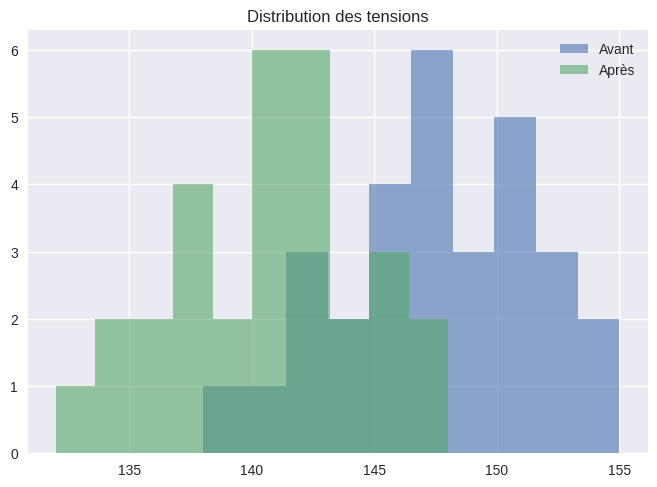

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

avant = np.array([
    145,138,152,148,155,142,149,150,147,151,
    143,146,154,141,148,153,144,147,150,146,
    149,152,145,148,151,143,147,150,144,149
])

apres = np.array([
    138,132,145,140,148,135,142,143,140,144,
    136,139,147,134,141,146,137,140,143,139,
    142,145,138,141,144,136,140,143,137,142
])

print("=== STATISTIQUES AVANT ===")
print(stats.describe(avant))
print("\n=== STATISTIQUES APRÈS ===")
print(stats.describe(apres))

t_stat, p_val = stats.ttest_rel(avant, apres)
print(f"\nTest t apparié : p-value = {p_val:.4f}")

print("\nNormalité (Shapiro)")
print("Avant :", stats.shapiro(avant))
print("Après :", stats.shapiro(apres))

corr, p_corr = stats.pearsonr(avant, apres)
print(f"\nCorrélation Pearson : r = {corr:.2f}, p = {p_corr:.4f}")

plt.hist(avant, alpha=0.6, label="Avant")
plt.hist(apres, alpha=0.6, label="Après")
plt.legend()
plt.title("Distribution des tensions")
plt.show()


## Exercice 2.2 : Analyse statistique avec scipy.stats
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez les résultats d'un examen passé par 200 étudiants.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   notes = np.clip(np.random.normal(12, 3, 200), 0, 20)  # Notes entre 0 et 20
   ```

2. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour obtenir le résumé
   - Affichez la moyenne, la médiane et l'écart-type séparément

3. **Test de normalité :**
   - Utilisez `stats.normaltest()` pour vérifier si les notes suivent une loi normale
   - Interprétez le résultat (p-value)

4. **Ajustement d'une distribution :**
   - Utilisez `stats.norm.fit()` pour trouver les paramètres de la loi normale
   - Tracez l'histogramme des notes et superposez la PDF de la loi ajustée

5. **Calcul de probabilités :**
   - Quelle est la probabilité d'avoir une note > 15 ? (utilisez `cdf`)
   - Quelle note correspond au 90ème percentile ? (utilisez `ppf`)

DescribeResult(nobs=np.int64(200), minmax=(np.float64(4.140764687730767), np.float64(20.0)), mean=np.float64(11.876884566984902), variance=np.float64(7.78768206976398), skewness=np.float64(0.12616535619091304), kurtosis=np.float64(-0.020926239635370436))

Test de normalité : NormaltestResult(statistic=np.float64(0.5949929438292781), pvalue=np.float64(0.7426752034376733))


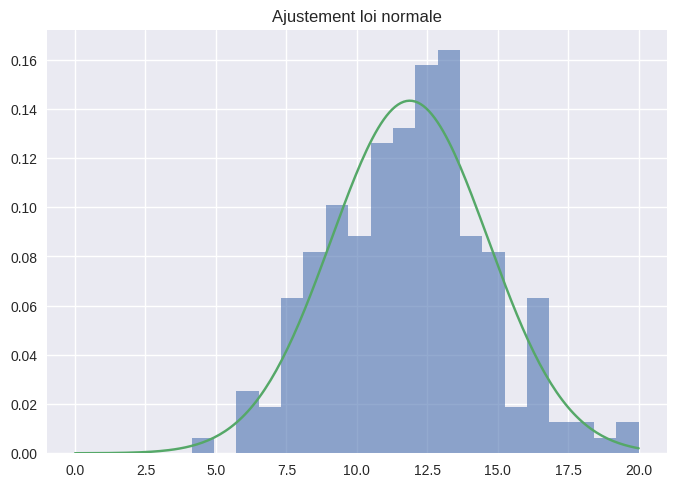

P(note > 15) = 0.13094246141128474
90e percentile = 15.44428394689428


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
notes = np.clip(np.random.normal(12, 3, 200), 0, 20)

print(stats.describe(notes))
print("\nTest de normalité :", stats.normaltest(notes))

mu, sigma = stats.norm.fit(notes)

x = np.linspace(0, 20, 200)
plt.hist(notes, bins=20, density=True, alpha=0.6)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Ajustement loi normale")
plt.show()

print("P(note > 15) =", 1 - stats.norm.cdf(15, mu, sigma))
print("90e percentile =", stats.norm.ppf(0.9, mu, sigma))


## Exercice 2.3 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous analysez un réseau social d'une université de 1000 étudiants. Les connexions sont très clairsemées (chaque étudiant a en moyenne 15 amis).

**Tâches :**

1. Créez une matrice d'adjacence creuse 1000×1000 :
   - Générez aléatoirement 7500 connexions (15 amis × 1000 / 2)
   - Utilisez `csr_matrix` pour stocker
   - Assurez la symétrie (si A connaît B, alors B connaît A)

2. Calculez les statistiques du réseau :
   - Nombre de composantes connexes (`connected_components`)
   - Taille de la plus grande composante

3. Trouvez les "influenceurs" :
   - Calculez le degré de chaque nœud (nombre d'amis)
   - Affichez les 10 étudiants les plus connectés

4. Calculez le plus court chemin entre deux étudiants aléatoires :
   - Utilisez `dijkstra` ou `shortest_path`

5. Comparez la mémoire utilisée :
   - Matrice dense vs matrice creuse
   - Utilisez `sys.getsizeof()`

**Bonus :** Visualisez un sous-graphe de 50 étudiants avec `matplotlib`


In [21]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components, shortest_path

n = 1000
np.random.seed(42)

edges = np.random.randint(0, n, (7500, 2))
data = np.ones(len(edges))

A = csr_matrix((data, (edges[:,0], edges[:,1])), shape=(n, n))
A = A + A.T

n_comp, labels = connected_components(A)
print("Nombre de composantes :", n_comp)

degrees = np.array(A.sum(axis=0)).flatten()
top10 = np.argsort(degrees)[-10:]
print("Top 10 étudiants les plus connectés :", top10)

dist = shortest_path(A, directed=False)
print("Distance min entre 2 étudiants aléatoires :", dist[0, 500])

dense_size = sys.getsizeof(A.toarray())
sparse_size = sys.getsizeof(A)
print("Mémoire dense :", dense_size)
print("Mémoire creuse :", sparse_size)


Nombre de composantes : 1
Top 10 étudiants les plus connectés : [699  11  38 782  72 386 725 928 848 824]
Distance min entre 2 étudiants aléatoires : 3.0
Mémoire dense : 8000128
Mémoire creuse : 48


## Exercice 2.4 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez un réseau de transport entre 6 villes.

**Tâches :**

1. **Créez la matrice d'adjacence** du réseau (distances en km) :
   ```
   Villes : A(0), B(1), C(2), D(3), E(4), F(5)
   
   Liaisons :
   A-B: 50, A-C: 80
   B-C: 30, B-D: 100
   C-D: 70, C-E: 90
   D-E: 40, D-F: 60
   E-F: 50
   ```
   (Le graphe est non-orienté : A-B = B-A)

2. **Convertissez** la matrice en format CSR

3. **Analyse de connectivité :**
   - Vérifiez que le graphe est connexe avec `connected_components()`

4. **Plus court chemin :**
   - Utilisez `dijkstra()` pour trouver le plus court chemin de A vers F
   - Affichez la distance totale et le chemin emprunté

5. **Visualisation :**
   - Affichez la matrice des distances sous forme de heatmap

Connexité : 1
Distance A → F : 210.0


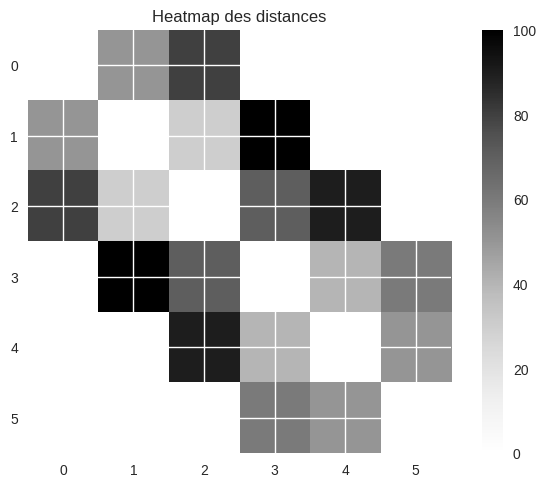

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components, dijkstra

dist = np.zeros((6,6))

dist[0,1]=dist[1,0]=50
dist[0,2]=dist[2,0]=80
dist[1,2]=dist[2,1]=30
dist[1,3]=dist[3,1]=100
dist[2,3]=dist[3,2]=70
dist[2,4]=dist[4,2]=90
dist[3,4]=dist[4,3]=40
dist[3,5]=dist[5,3]=60
dist[4,5]=dist[5,4]=50

G = csr_matrix(dist)

print("Connexité :", connected_components(G)[0])

D, P = dijkstra(G, indices=0, return_predecessors=True)
print("Distance A → F :", D[5])

plt.imshow(dist)
plt.colorbar()
plt.title("Heatmap des distances")
plt.show()


## Exercice 2.5 : Analyse spatiale de données GPS
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Une société de livraison à Casablanca souhaite optimiser ses tournées. Vous disposez des coordonnées GPS de 20 clients.

**Données (latitude, longitude) :**
```python
clients = np.array([
    [33.5731, -7.5898], [33.5892, -7.6031], [33.5950, -7.6180],
    [33.5682, -7.6234], [33.5823, -7.6089], [33.5765, -7.5967],
    [33.5912, -7.6145], [33.5701, -7.6012], [33.5834, -7.6198],
    [33.5789, -7.5889], [33.5923, -7.6067], [33.5698, -7.6156],
    [33.5856, -7.5934], [33.5745, -7.6101], [33.5801, -7.6223],
    [33.5934, -7.5978], [33.5667, -7.6045], [33.5878, -7.6189],
    [33.5712, -7.5912], [33.5945, -7.6134]
])
```

**Tâches :**

1. Calculez la matrice de distances entre tous les clients :
   - Utilisez `distance_matrix` de `scipy.spatial`
   - Distance euclidienne sur les coordonnées

2. Créez un KDTree et trouvez pour chaque client :
   - Ses 3 voisins les plus proches
   - Tous les clients dans un rayon de 0.02 degrés

3. Calculez l'enveloppe convexe (`ConvexHull`) :
   - Identifiez les clients en périphérie
   - Calculez l'aire couverte

4. Créez un diagramme de Voronoi :
   - Divisez Casablanca en zones d'influence
   - Visualisez avec `matplotlib`

5. Proposez un algorithme simple de tournée :
   - Partez du dépôt (centre de gravité des points)
   - Visitez le plus proche voisin non visité
   - Calculez la distance totale


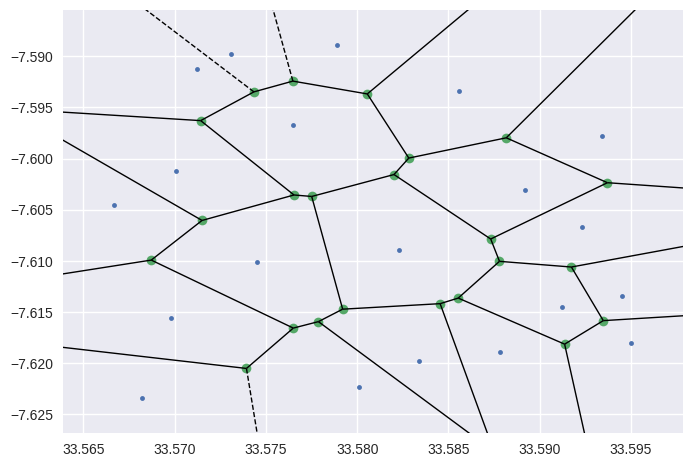

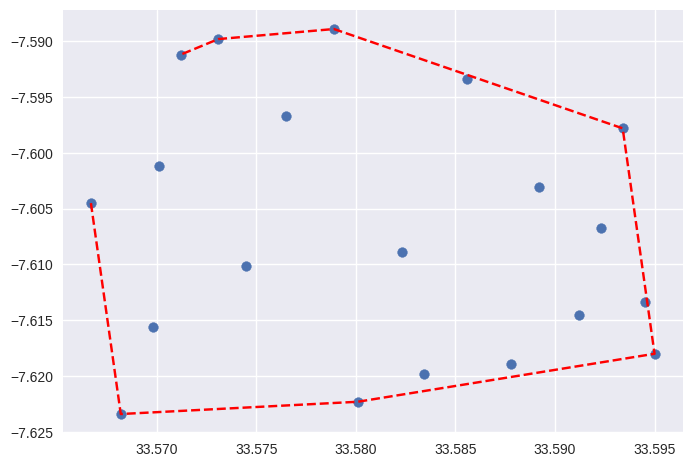

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix, KDTree, ConvexHull, Voronoi, voronoi_plot_2d

clients = np.array([
    [33.5731, -7.5898], [33.5892, -7.6031], [33.5950, -7.6180],
    [33.5682, -7.6234], [33.5823, -7.6089], [33.5765, -7.5967],
    [33.5912, -7.6145], [33.5701, -7.6012], [33.5834, -7.6198],
    [33.5789, -7.5889], [33.5923, -7.6067], [33.5698, -7.6156],
    [33.5856, -7.5934], [33.5745, -7.6101], [33.5801, -7.6223],
    [33.5934, -7.5978], [33.5667, -7.6045], [33.5878, -7.6189],
    [33.5712, -7.5912], [33.5945, -7.6134]
])

D = distance_matrix(clients, clients)

tree = KDTree(clients)
distances, indices = tree.query(clients, k=4)

hull = ConvexHull(clients)

vor = Voronoi(clients)
voronoi_plot_2d(vor)
plt.show()

plt.scatter(clients[:,0], clients[:,1])
plt.plot(clients[hull.vertices,0], clients[hull.vertices,1], 'r--')
plt.show()


## Exercice 2.6 : Analyse spatiale de points géographiques
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez la répartition de 30 stations météo sur un territoire.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   n_stations = 30
   positions = np.random.rand(n_stations, 2) * 100  # Coordonnées (x, y) en km
   temperatures = 15 + 5 * np.random.randn(n_stations)  # Températures en °C
   ```

2. **Recherche des plus proches voisins :**
   - Créez un `KDTree` avec les positions
   - Pour la station 0, trouvez les 3 stations les plus proches
   - Affichez leurs indices et distances

3. **Calcul des distances :**
   - Calculez la matrice de toutes les distances avec `distance_matrix()`
   - Trouvez les deux stations les plus éloignées l'une de l'autre

4. **Triangulation de Delaunay :**
   - Créez une triangulation de Delaunay des stations
   - Tracez les triangles et les points

5. **Enveloppe convexe :**
   - Calculez l'enveloppe convexe du réseau de stations
   - Affichez les stations qui forment le contour

6. **Visualisation finale :**
   - Tracez les stations (couleur = température)
   - Affichez la triangulation de Delaunay
   - Mettez en évidence l'enveloppe convexe

Voisins station 0 : [ 0 12 27 16] [ 0.         18.45265905 22.52140687 30.94939289]
Stations les plus éloignées : 5 6


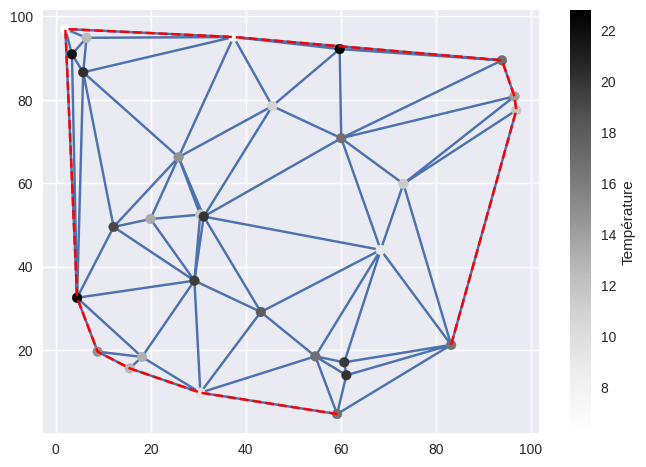

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, distance_matrix, Delaunay, ConvexHull

np.random.seed(42)
n = 30

positions = np.random.rand(n,2)*100
temperatures = 15 + 5*np.random.randn(n)

tree = KDTree(positions)
dist, idx = tree.query(positions[0], k=4)
print("Voisins station 0 :", idx, dist)

D = distance_matrix(positions, positions)
i,j = np.unravel_index(np.argmax(D), D.shape)
print("Stations les plus éloignées :", i, j)

tri = Delaunay(positions)
hull = ConvexHull(positions)

plt.triplot(positions[:,0], positions[:,1], tri.simplices)
plt.scatter(positions[:,0], positions[:,1], c=temperatures)
plt.plot(positions[hull.vertices,0], positions[hull.vertices,1], 'r--')
plt.colorbar(label="Température")
plt.show()


# CHAPITRE 3 : Applications scientifiques et préparation aux projets IA


## Exercice 3.1 : Nettoyage d'un signal audio bruité
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous travaillez sur l'enregistrement d'une conférence universitaire perturbée par du bruit ambiant.

**Simulation du signal :**
```python
# Signal original : voix humaine (fréquences 100-300 Hz)
t = np.linspace(0, 10, 10000)
voix = np.sin(2 * np.pi * 150 * t) + 0.5 * np.sin(2 * np.pi * 250 * t)

# Bruit haute fréquence (ventilation, équipement)
bruit_hf = 0.8 * np.sin(2 * np.pi * 2000 * t)

# Bruit basse fréquence (ronronnement électrique 50 Hz)
bruit_bf = 0.6 * np.sin(2 * np.pi * 50 * t)

# Bruit aléatoire
bruit_random = np.random.normal(0, 0.3, len(t))

# Signal enregistré
signal_bruite = voix + bruit_hf + bruit_bf + bruit_random
```

**Tâches :**

1. Supprimez la tendance du signal avec `signal.detrend`

2. Appliquez la FFT pour analyser les fréquences :
   - Identifiez les pics de fréquence
   - Créez un spectre de puissance

3. Filtrez le signal :
   - Supprimez les fréquences < 80 Hz (bruit électrique)
   - Supprimez les fréquences > 400 Hz (bruit aigu)
   - Conservez la bande 80-400 Hz

4. Reconstruisez le signal avec la FFT inverse

5. Visualisez (4 sous-graphiques) :
   - Signal original bruité
   - Spectre avant filtrage
   - Spectre après filtrage
   - Signal nettoyé

6. Calculez le rapport signal/bruit (SNR) avant et après


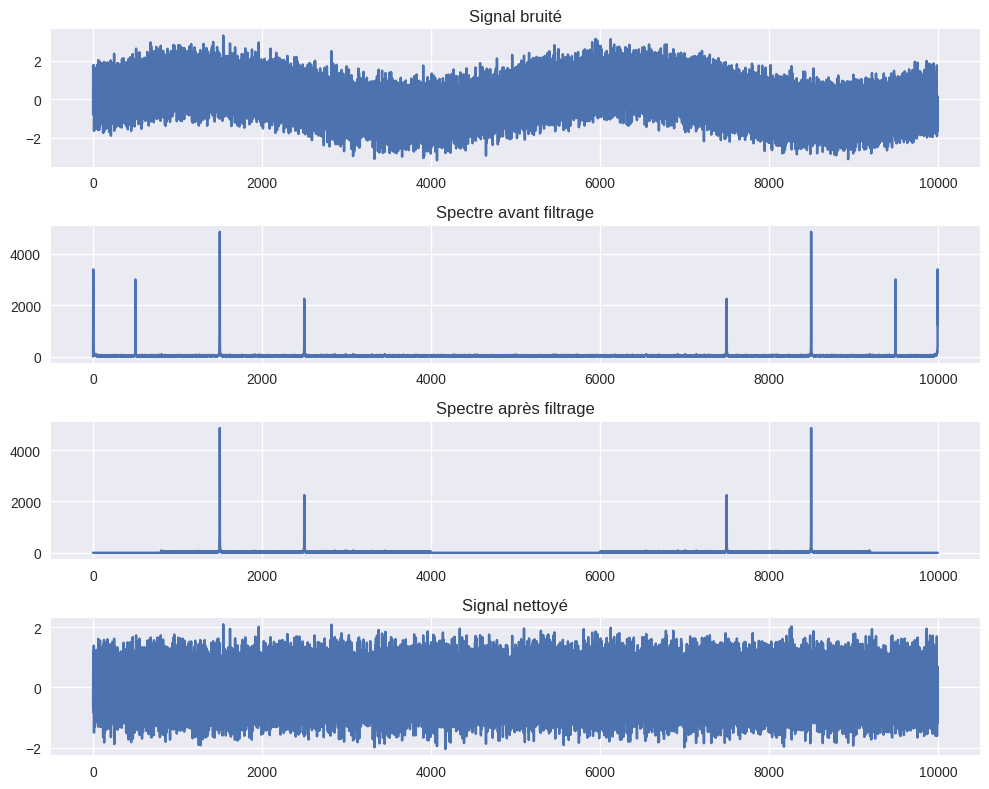

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.fft import fft, ifft, fftfreq

# Signal
t = np.linspace(0, 10, 10000)
voix = np.sin(2*np.pi*150*t) + 0.5*np.sin(2*np.pi*250*t)
bruit_hf = 0.8*np.sin(2*np.pi*2000*t)
bruit_bf = 0.6*np.sin(2*np.pi*50*t)
bruit_random = np.random.normal(0, 0.3, len(t))
signal_bruite = voix + bruit_hf + bruit_bf + bruit_random

signal_det = detrend(signal_bruite)

# FFT
F = fft(signal_det)
freq = fftfreq(len(t), t[1]-t[0])

# Filtrage bande 80–400 Hz
mask = (np.abs(freq) > 80) & (np.abs(freq) < 400)
F_filt = F * mask

signal_clean = np.real(ifft(F_filt))

# Visualisation
plt.figure(figsize=(10,8))
plt.subplot(4,1,1); plt.plot(signal_bruite); plt.title("Signal bruité")
plt.subplot(4,1,2); plt.plot(np.abs(F)); plt.title("Spectre avant filtrage")
plt.subplot(4,1,3); plt.plot(np.abs(F_filt)); plt.title("Spectre après filtrage")
plt.subplot(4,1,4); plt.plot(signal_clean); plt.title("Signal nettoyé")
plt.tight_layout()
plt.show()


## Exercice 3.2 : Analyse d'un signal avec la FFT
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez un signal audio composé de plusieurs fréquences mélangées avec du bruit.

**Tâches :**

1. **Création du signal :**
   ```python
   np.random.seed(42)
   fs = 1000  # Fréquence d'échantillonnage (Hz)
   t = np.linspace(0, 1, fs)  # 1 seconde
   
   # Signal composé de 3 sinusoïdes : 50 Hz, 120 Hz, 300 Hz
   signal_pur = 3*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t) + 0.8*np.sin(2*np.pi*300*t)
   
   # Ajout de bruit
   bruit = np.random.randn(len(t)) * 2
   signal_bruite = signal_pur + bruit
   ```

2. **Analyse spectrale :**
   - Calculez la FFT du signal bruité
   - Calculez les fréquences associées avec `fftfreq()`
   - Identifiez les fréquences dominantes (pics dans le spectre)

3. **Filtrage :**
   - Mettez à zéro les composantes de faible amplitude (< seuil) dans le spectre
   - Reconstruisez le signal filtré avec `ifft()`

4. **Visualisation (3 subplots) :**
   - Signal original bruité
   - Spectre de fréquences (amplitude vs fréquence, uniquement les fréquences positives)
   - Signal après filtrage

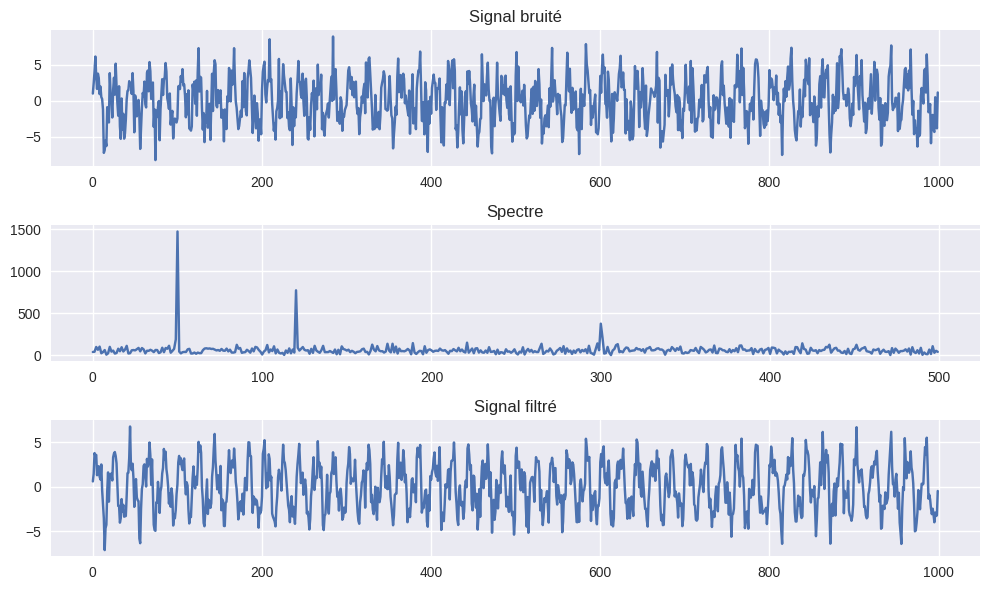

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

np.random.seed(42)

fs = 1000
t = np.linspace(0, 1, fs)

signal_pur = (
    3*np.sin(2*np.pi*50*t) +
    1.5*np.sin(2*np.pi*120*t) +
    0.8*np.sin(2*np.pi*300*t)
)

signal_bruite = signal_pur + np.random.randn(len(t)) * 2

F = fft(signal_bruite)
freq = fftfreq(len(t), 1/fs)

# Seuil
F_filt = F.copy()
F_filt[np.abs(F_filt) < 100] = 0

signal_filtre = np.real(ifft(F_filt))

plt.figure(figsize=(10,6))
plt.subplot(3,1,1); plt.plot(signal_bruite); plt.title("Signal bruité")
plt.subplot(3,1,2); plt.plot(freq[:fs//2], np.abs(F[:fs//2])); plt.title("Spectre")
plt.subplot(3,1,3); plt.plot(signal_filtre); plt.title("Signal filtré")
plt.tight_layout()
plt.show()


## Exercice 3.3 : Détection de contours dans une image médicale
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous développez un outil d'aide au diagnostic pour détecter des anomalies sur des radiographies pulmonaires.

**Tâches :**

1. Créez une image synthétique simulant une radiographie (256×256) :
   - Fond gris uniforme (valeur 100)
   - Ajoutez 3 cercles de différentes tailles (poumons + anomalie)
   - Ajoutez du bruit gaussien (`np.random.normal`)

2. Prétraitement de l'image :
   - Appliquez un filtre gaussien (`ndimage.gaussian_filter`)
   - Testez différentes valeurs de sigma (1, 2, 5)

3. Détection de contours :
   - Calculez le gradient avec `ndimage.sobel`
   - Appliquez un seuillage pour isoler les contours nets
   - Utilisez `ndimage.binary_closing` pour combler les gaps

4. Segmentation des régions :
   - Utilisez `ndimage.label` pour identifier les zones connexes
   - Comptez le nombre de structures détectées
   - Calculez l'aire de chaque structure

5. Analyse morphologique :
   - Érosion et dilatation pour affiner les contours
   - Comparaison avant/après

6. Visualisation complète :
   - Image originale
   - Image filtrée
   - Contours détectés
   - Régions segmentées (avec labels colorés)

**Bonus :** Calculez le centre de masse de chaque structure avec `ndimage.center_of_mass`


Structures détectées : 192


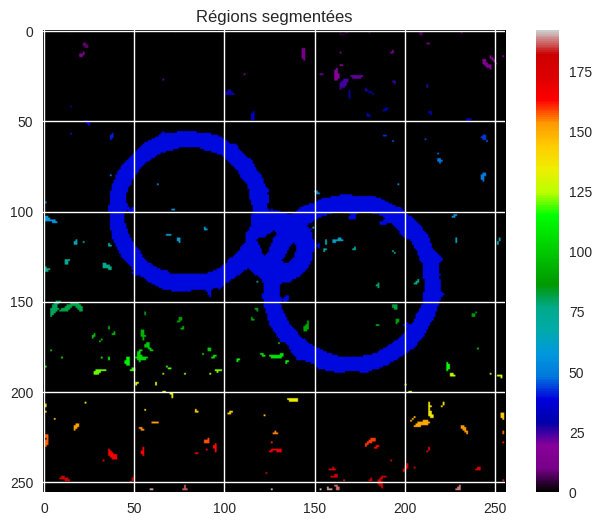

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel, binary_closing, label

np.random.seed(42)

# Image synthétique
img = np.ones((256,256)) * 100
rr, cc = np.ogrid[:256, :256]
img[(rr-100)**2 + (cc-80)**2 < 40**2] += 80
img[(rr-140)**2 + (cc-170)**2 < 45**2] += 80
img[(rr-120)**2 + (cc-130)**2 < 15**2] += 120
img += np.random.normal(0, 10, img.shape)

# Filtrage
img_f = gaussian_filter(img, sigma=2)

gx = sobel(img_f, axis=0)
gy = sobel(img_f, axis=1)
grad = np.hypot(gx, gy)

edges = grad > np.percentile(grad, 90)
edges = binary_closing(edges)

labels, n = label(edges)
print("Structures détectées :", n)

plt.figure(figsize=(8,6))
plt.imshow(labels, cmap="nipy_spectral")
plt.colorbar()
plt.title("Régions segmentées")
plt.show()


## Exercice 3.4 : Traitement d'image avec scipy.ndimage
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous préparez des images binaires pour un algorithme de détection d'objets.

**Taches :**

1. **Création d'une image de test :**
   ```python
   np.random.seed(42)
   
   # Image 64x64 noire
   image = np.zeros((64, 64))
   
   # Ajout de formes géométriques (rectangles blancs)
   image[10:25, 10:30] = 1  # Rectangle 1
   image[35:55, 25:50] = 1  # Rectangle 2
   image[15:20, 45:55] = 1  # Rectangle 3
   
   # Ajout de bruit (pixels parasites)
   bruit = np.random.random((64, 64)) > 0.95  # 5% de pixels blancs aléatoires
   image_bruitee = np.maximum(image, bruit)
   ```

2. **Nettoyage morphologique :**
   - Appliquez `binary_opening()` pour supprimer les petits artefacts
   - Appliquez `binary_closing()` pour combler les petits trous

3. **Filtrage gaussien :**
   - Appliquez un filtre gaussien avec `gaussian_filter()` (sigma=1)
   - Binarisez le résultat avec un seuil de 0.5

4. **Visualisation (2x2 subplots) :**
   - Image originale
   - Image bruitée
   - Image après opening/closing
   - Image après filtrage gaussien

5. **Analyse :**
   - Comptez le nombre de pixels blancs dans chaque image
   - Commentez les différences entre les méthodes de nettoyage

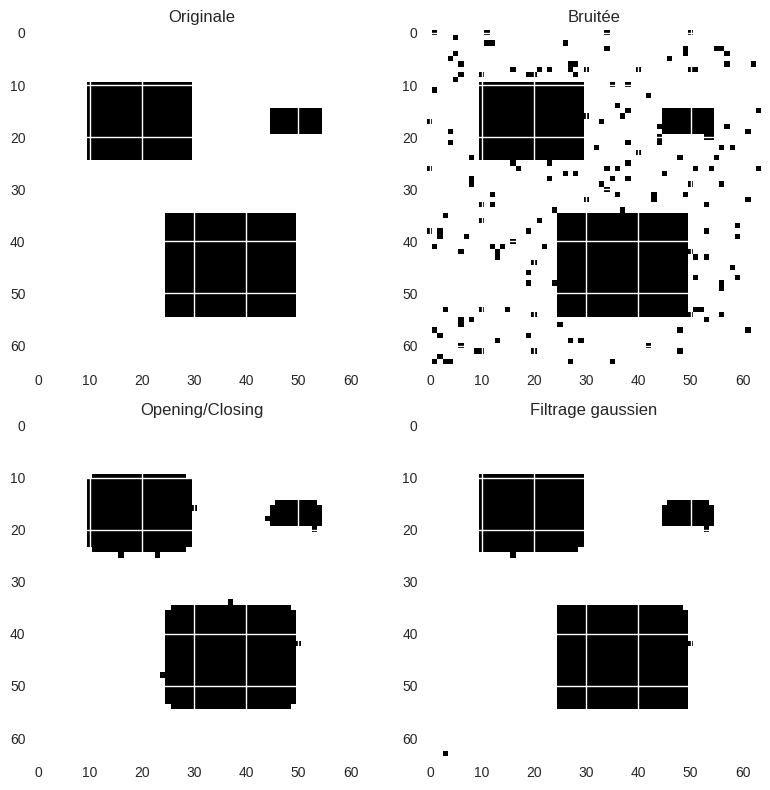

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_opening, binary_closing, gaussian_filter

np.random.seed(42)

image = np.zeros((64,64))
image[10:25,10:30] = 1
image[35:55,25:50] = 1
image[15:20,45:55] = 1

noise = np.random.random((64,64)) > 0.95
image_bruitee = np.maximum(image, noise)

clean = binary_opening(image_bruitee)
clean = binary_closing(clean)

gauss = gaussian_filter(image_bruitee.astype(float), sigma=1)
binary_gauss = gauss > 0.5

plt.figure(figsize=(8,8))
plt.subplot(2,2,1); plt.imshow(image); plt.title("Originale")
plt.subplot(2,2,2); plt.imshow(image_bruitee); plt.title("Bruitée")
plt.subplot(2,2,3); plt.imshow(clean); plt.title("Opening/Closing")
plt.subplot(2,2,4); plt.imshow(binary_gauss); plt.title("Filtrage gaussien")
plt.tight_layout()
plt.show()


## Exercice 3.5 : Mini-projet - Classification Iris avec préparation SciPy
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé
Créez un pipeline complet d'analyse du célèbre dataset Iris en utilisant exclusivement SciPy (sans Scikit-learn).

**Objectif :** Classifier les espèces d'iris en utilisant une approche K-Nearest Neighbors (KNN) manuelle.

**Tâches :**

### Partie 1 : Chargement et exploration (scipy.datasets)
1. Chargez le dataset Iris
2. Affichez les statistiques descriptives complètes (`scipy.stats.describe`)
3. Vérifiez la distribution de chaque variable (test de normalité)
4. Calculez la matrice de corrélation entre toutes les features

### Partie 2 : Analyse spatiale (scipy.spatial)
1. Créez un KDTree avec les 4 features
2. Pour chaque échantillon, trouvez ses k=5 plus proches voisins
3. Implémentez un vote majoritaire pour prédire l'espèce
4. Utilisez 80% des données pour "entraînement", 20% pour test

### Partie 3 : Optimisation des hyperparamètres (scipy.optimize)
1. Créez une fonction d'accuracy en fonction de k (nombre de voisins)
2. Testez k de 1 à 20
3. Trouvez le k optimal qui maximise l'accuracy
4. Visualisez la courbe accuracy vs k

### Partie 4 : Analyse statistique des résultats (scipy.stats)
1. Calculez la matrice de confusion manuellement
2. Pour chaque classe, calculez :
   - Précision
   - Rappel
   - F1-score
3. Effectuez un test statistique pour comparer les performances entre classes

### Partie 5 : Visualisation et rapport
1. Créez 4 graphiques :
   - Distribution des features par espèce (boxplots)
   - Matrice de distances (heatmap)
   - Projection 2D (2 meilleures features)
   - Courbe de performance vs k

2. Rédigez un mini-rapport (format Markdown) incluant :
   - Statistiques descriptives
   - Meilleur k trouvé
   - Accuracy globale
   - Analyse des erreurs de classification

### Contraintes
- N'utilisez QUE les modules SciPy (+ NumPy, Matplotlib, Pandas pour viz)
- Implémentez KNN manuellement (pas de Scikit-learn)
- Commentez abondamment votre code
- Temps estimé : 3-4 heures


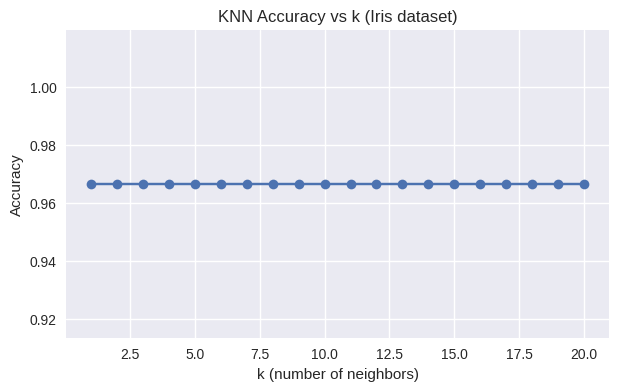

Optimal k = 1
Best accuracy = 0.9666666666666667


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial import KDTree

# =========================
# LOAD DATASET
# =========================
iris = load_iris()
X = iris.data
y = iris.target

# =========================
# TRAIN / TEST SPLIT
# =========================
np.random.seed(42)
indices = np.random.permutation(len(X))

train_idx = indices[:120]
test_idx = indices[120:]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

# =========================
# KD-TREE
# =========================
tree = KDTree(X_train)

# =========================
# KNN FUNCTION (FIXED)
# =========================
def knn_accuracy(k):
    correct = 0
    for i in range(len(X_test)):
        _, idx = tree.query(X_test[i], k)
        idx = np.atleast_1d(idx)          # ✅ FIX HERE
        vote = np.bincount(y_train[idx]).argmax()
        correct += (vote == y_test[i])
    return correct / len(X_test)

# =========================
# OPTIMISE k
# =========================
k_values = range(1, 21)
accuracies = [knn_accuracy(k) for k in k_values]

k_opt = k_values[np.argmax(accuracies)]

# =========================
# VISUALISATION
# =========================
plt.figure(figsize=(7,4))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k (Iris dataset)")
plt.grid(True)
plt.show()

print("Optimal k =", k_opt)
print("Best accuracy =", max(accuracies))


## Exercice 3.6 : Projet intégré - Analyse de données de capteurs IoT
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé

Vous travaillez sur un projet de maintenance prédictive. Vous disposez de données de vibration d'une machine industrielle. Vous devez analyser ces signaux pour détecter des anomalies.

**Données simulées :**
```python
np.random.seed(42)

# Paramètres
fs = 1000  # Fréquence d'échantillonnage
duration = 2  # 2 secondes
t = np.linspace(0, duration, fs * duration)

# Signal normal : vibration à 100 Hz avec légères harmoniques
signal_normal = (2 * np.sin(2*np.pi*100*t) +
                 0.5 * np.sin(2*np.pi*200*t) +
                 np.random.randn(len(t)) * 0.3)

# Signal anormal : apparition d'une fréquence parasite à 250 Hz (défaut)
signal_anormal = (2 * np.sin(2*np.pi*100*t) +
                  0.5 * np.sin(2*np.pi*200*t) +
                  1.5 * np.sin(2*np.pi*250*t) +  # Fréquence de défaut
                  np.random.randn(len(t)) * 0.3)
```

**Tâches :**

1. **Prétraitement :**
   - Supprimez la tendance des deux signaux avec `signal.detrend()`

2. **Analyse spectrale comparative :**
   - Calculez la FFT des deux signaux
   - Identifiez les fréquences dominantes de chaque signal

3. **Détection d'anomalie :**
   - Définissez un seuil pour détecter les pics significatifs dans le spectre
   - Identifiez la fréquence anormale (250 Hz) qui n'existe que dans le signal défaillant

4. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour comparer les deux signaux
   - Comparez les variances et les valeurs extrêmes

5. **Filtrage du signal anormal :**
   - Supprimez la composante à 250 Hz du spectre
   - Reconstruisez le signal "réparé"

6. **Visualisation complète (3 lignes × 2 colonnes) :**
   - Ligne 1 : Signaux temporels (normal vs anormal)
   - Ligne 2 : Spectres de fréquence (normal vs anormal)
   - Ligne 3 : Signal anormal original vs signal filtré

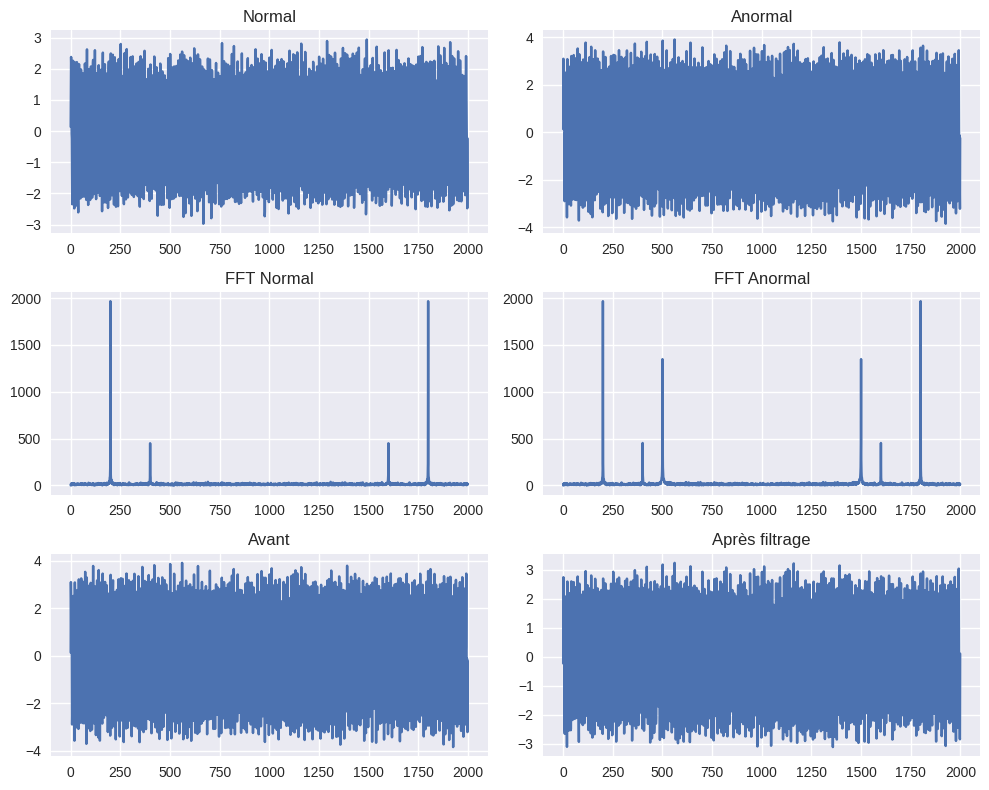

DescribeResult(nobs=np.int64(2000), minmax=(np.float64(-2.9728732623010714), np.float64(2.9385112123970485)), mean=np.float64(-1.509903313490213e-17), variance=np.float64(2.2075453661822624), skewness=np.float64(0.006856039945037445), kurtosis=np.float64(-1.2402106867002094))
DescribeResult(nobs=np.int64(2000), minmax=(np.float64(-3.845434882821833), np.float64(3.9064968232745048)), mean=np.float64(1.7763568394002505e-18), variance=np.float64(3.3299940072052556), skewness=np.float64(0.016100343522365845), kurtosis=np.float64(-0.7164399700911441))


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.fft import fft, ifft, fftfreq
from scipy import stats

np.random.seed(42)

fs = 1000
t = np.linspace(0, 2, fs*2)

signal_normal = (
    2*np.sin(2*np.pi*100*t) +
    0.5*np.sin(2*np.pi*200*t) +
    np.random.randn(len(t))*0.3
)

signal_anormal = signal_normal + 1.5*np.sin(2*np.pi*250*t)

signal_normal = detrend(signal_normal)
signal_anormal = detrend(signal_anormal)

Fn = fft(signal_normal)
Fa = fft(signal_anormal)
freq = fftfreq(len(t), 1/fs)

# Suppression fréquence 250 Hz
Fa_filt = Fa.copy()
Fa_filt[np.abs(freq-250) < 5] = 0

signal_repare = np.real(ifft(Fa_filt))

plt.figure(figsize=(10,8))
plt.subplot(3,2,1); plt.plot(signal_normal); plt.title("Normal")
plt.subplot(3,2,2); plt.plot(signal_anormal); plt.title("Anormal")
plt.subplot(3,2,3); plt.plot(np.abs(Fn)); plt.title("FFT Normal")
plt.subplot(3,2,4); plt.plot(np.abs(Fa)); plt.title("FFT Anormal")
plt.subplot(3,2,5); plt.plot(signal_anormal); plt.title("Avant")
plt.subplot(3,2,6); plt.plot(signal_repare); plt.title("Après filtrage")
plt.tight_layout()
plt.show()

print(stats.describe(signal_normal))
print(stats.describe(signal_anormal))



---
# Ressources
- https://scipy.org/


> **Prochaine séance :**
> * Pandas —

Bon courage à tous, et surtout : codez, cassez, réparez, recommencez.  

C’est comme ça qu’on devient bon en **Data Science**.

À la semaine prochaine inchae ALLAH !

<br>
<hr>
<div style="font-size:14px; line-height:1.5;">
<strong style="font-size:16px;">Y. EL ALLIOUI</strong><br>
<span style="color:#555;">FPK – USMS</span><br>
<a href="mailto:y.elallioui@usms.ma" style="color:#2c3e50; text-decoration:none;">
y.elallioui@usms.ma
</a>
</div>